In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization purposes
import seaborn as sns # for statistical data visualization
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv
/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv


In [2]:
import warnings

warnings.filterwarnings('ignore')

# Başlangıç

data yükleme

In [3]:
df = pd.read_csv('../input/heart-attack-analysis-prediction-dataset/heart.csv')
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## toplam veri ve özellik sayısını gösteriyor

In [4]:
df.shape

(303, 14)

## özelliklerin bilgilerini yazdırıyor (boşluk var mı?,hangi tip veri)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## veride boşluk var mı kontrol ediliyor##

In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

## veri özellikler ve sonuç olarak 2ye ayrılıyor

In [7]:
X = df.iloc[:,0:13]

y = df.iloc[:,-1]


In [8]:
X

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [9]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: output, Length: 303, dtype: int64

# kolerizayon 

In [10]:
corr = df.corr()
corr['output']

age        -0.225439
sex        -0.280937
cp          0.433798
trtbps     -0.144931
chol       -0.085239
fbs        -0.028046
restecg     0.137230
thalachh    0.421741
exng       -0.436757
oldpeak    -0.430696
slp         0.345877
caa        -0.391724
thall      -0.344029
output      1.000000
Name: output, dtype: float64

# Normalize ediliyor

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data = scaler.fit_transform(X)
X = pd.DataFrame(data = data,columns = X.columns)
X.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667


# PCA uygulanıyor

In [12]:
from sklearn.decomposition import PCA
pca = PCA(0.90) 
pca.fit(X)

PCA(n_components=0.9)

In [13]:
X = pca.transform(X)
X.shape

(303, 8)

# test ve train dataları ayrılıyor

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [15]:
X_train.shape, X_test.shape

((242, 8), (61, 8))

# Naive Bayes Classifier

In [16]:
from sklearn.naive_bayes import GaussianNB


# instantiate the model
gnb = GaussianNB()


# fit the model
gnb.fit(X_train, y_train)

GaussianNB()

In [17]:
y_pred = gnb.predict(X_test)

y_pred

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1])

## Sonuç

In [18]:
from sklearn.metrics import accuracy_score
from sklearn import metrics
print(metrics.classification_report(y_test,y_pred))
#print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

              precision    recall  f1-score   support

           0       0.69      0.74      0.71        27
           1       0.78      0.74      0.76        34

    accuracy                           0.74        61
   macro avg       0.74      0.74      0.74        61
weighted avg       0.74      0.74      0.74        61



True Positives (TP) – True Positives, bir gözlemin belirli bir sınıfa ait olduğunu ve gözlemin aslında o sınıfa ait olduğunu tahmin ettiğimizde ortaya çıkar.

Gerçek Negatifler (TN) – Gerçek Negatifler, bir gözlemin belirli bir sınıfa ait olmadığını ve gözlemin aslında o sınıfa ait olmadığını tahmin ettiğimizde ortaya çıkar.

Yanlış Pozitifler (FP) – Yanlış Pozitifler, bir gözlemin belirli bir sınıfa ait olduğunu tahmin ettiğimizde ortaya çıkar, ancak gözlem aslında o sınıfa ait değildir. Bu tip hataya Tip I hata denir.

Yanlış Negatifler (FN) – Yanlış Negatifler, bir gözlemin belirli bir sınıfa ait olmadığını, ancak gözlemin aslında o sınıfa ait olduğunu tahmin ettiğimizde ortaya çıkar. Bu çok ciddi bir hatadır ve Tip II hata olarak adlandırılır.

In [19]:
from sklearn.metrics import confusion_matrix

cmnaiv = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cmnaiv)

print('\nTrue Positives(TP) = ', cmnaiv[0,0])

print('\nTrue Negatives(TN) = ', cmnaiv[1,1])

print('\nFalse Positives(FP) = ', cmnaiv[0,1])

print('\nFalse Negatives(FN) = ', cmnaiv[1,0])

Confusion matrix

 [[20  7]
 [ 9 25]]

True Positives(TP) =  20

True Negatives(TN) =  25

False Positives(FP) =  7

False Negatives(FN) =  9


<AxesSubplot:>

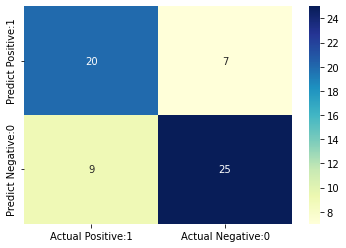

In [20]:
cmnaiv_matrix = pd.DataFrame(data=cmnaiv, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cmnaiv_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [21]:
TP = cmnaiv[0,0]
TN = cmnaiv[1,1]
FP = cmnaiv[0,1]
FN = cmnaiv[1,0]

## Doğruluk oranı

In [22]:
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.7377


## Hata oranı

In [23]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.2623


## Kesinlik

In [24]:
precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.7407


## Duyarlılık

In [25]:
#hassasiyet
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.6897


## özgünlük

In [26]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.7812


# KNN

In [27]:
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [28]:
result = knn.predict(X_test)
result


array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1])

In [29]:
print(metrics.classification_report(y_test,result))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83        27
           1       0.86      0.88      0.87        34

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [30]:
cmknn = confusion_matrix(y_test, result)

print('Confusion matrix\n\n', cmknn)

print('\nTrue Positives(TP) = ', cmknn[0,0])

print('\nTrue Negatives(TN) = ', cmknn[1,1])

print('\nFalse Positives(FP) = ', cmknn[0,1])

print('\nFalse Negatives(FN) = ', cmknn[1,0])

Confusion matrix

 [[22  5]
 [ 4 30]]

True Positives(TP) =  22

True Negatives(TN) =  30

False Positives(FP) =  5

False Negatives(FN) =  4


<AxesSubplot:>

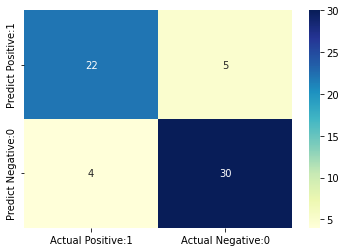

In [31]:
cmknn_matrix = pd.DataFrame(data=cmknn, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cmknn_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [32]:
TP = cmknn[0,0]
TN = cmknn[1,1]
FP = cmknn[0,1]
FN = cmknn[1,0]

## Doğruluk oranı

In [33]:
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.8525


## Hata oranı

In [34]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1475


## Kesinlik

In [35]:
precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.8148


## Duyarlılık

In [36]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.8462


## özgünlük

In [37]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.8571
